# Analysis of All Space Missions from 1957

### Content

 1. Introduction: All Space Missions fron 1957
 2. Data description
 3. Research questions
 4. Data preparation: cleaning and shaping
 5. EDA and Visualisation
 6. Conclusion

## 1. Introduction:  All Space Missions from 1957

Space exploration is the use of astronomy and space technology to explore outer space. While the exploration of space is carried out mainly by astronomers with telescopes, its physical exploration though is conducted both by unmanned robotic space probes and human spaceflight. Space exploration, like its classical form astronomy, is one of the main sources for space science.

While the observation of objects in space, known as astronomy, predates reliable recorded history, it was the development of large and relatively efficient rockets during the mid-twentieth century that allowed physical space exploration to become a reality. Common rationales for exploring space include advancing scientific research, national prestige, uniting different nations, ensuring the future survival of humanity, and developing military and strategic advantages against other countries

 Source (https://en.wikipedia.org/wiki/Space_exploration)

## 2. Data description

My based on the space missions in period 1957-2017 
 Below the data that will be used in analysis:
+ Company-company name
+ Location-Location of the Launch
+ Date-Date of launch
+ Detail-rocket name
+ Status Rocket-Status of the rocket
+ Rocket-Cost of the mission: in dollar million
+ Status mission-Status of the mission



## 3. Research questions

In this project, mainly I will focus on several parts of data analysis and visualization:
1. Analyze success of the space missions
2. Analyze cost of mission and its influence on result
3. Analyze Location of launch to success of mission 
4. Analyze rocket status
5. Analyze failure rate in different company

## 4. Data preparation: cleaning and shaping

At this part, I have almost ready dataset but I should make some operations with them:
 * check for the inconsistencies
 * drop columns that will not be used

In [141]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [142]:
#read dataset 
df = pd.read_csv("Space_Corrected.csv")


In [143]:
df = df.rename(columns={' Rocket': 'Cost'})
#Rename coulmn to macth with data and drop unnesesary coulmn
df['Cost'] = pd.to_numeric(df['Cost'],errors='coerce')
#convert numerical data to apropriate datatype
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
df = df.dropna()
#drop rows that habe null values and reset indexing

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 4020
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company Name    949 non-null    object 
 1   Location        949 non-null    object 
 2   Datum           949 non-null    object 
 3   Detail          949 non-null    object 
 4   Status Rocket   949 non-null    object 
 5   Cost            949 non-null    float64
 6   Status Mission  949 non-null    object 
dtypes: float64(1), object(6)
memory usage: 59.3+ KB
None


In [144]:
df['DateTime'] = pd.to_datetime(df['Datum'])

# Extract the launch year
df['Year'] = df['DateTime'].apply(lambda datetime: datetime.year)
df = df.reindex()
# Extract the country of launch

df["Country"] = df["Location"].apply(lambda location: location.split(", ")[-1])

df.head(10)

,Company Name,Location,Datum,Detail,Status Rocket,Cost,Status Mission,DateTime,Year,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00+00:00,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020-07-30 11:50:00+00:00,2020,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020-07-25 03:13:00+00:00,2020,China
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,2020-07-23 14:26:00+00:00,2020,Kazakhstan
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,2020-07-20 21:30:00+00:00,2020,USA
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.00,Success,2020-07-19 21:58:00+00:00,2020,Japan
10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA","Wed Jul 15, 2020 13:46 UTC",Minotaur IV | NROL-129,StatusActive,46.00,Success,2020-07-15 13:46:00+00:00,2020,USA
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.30,Failure,2020-07-10 04:17:00+00:00,2020,China


  ## 5.EDA and Visualisation

## 5.1 Analyze success of the space missions

Pie chart visualisation of percentage of failure/success

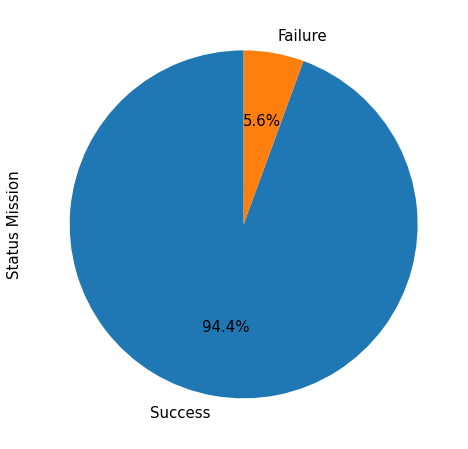

In [145]:
plt.rcParams['font.size'] = 15.0
df["Status Mission"] = df["Status Mission"].replace(".* Failure","Failure",regex=True)
df['Status Mission'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8),startangle=90)


## 5.2. Analyze cost of mission and its influence on result


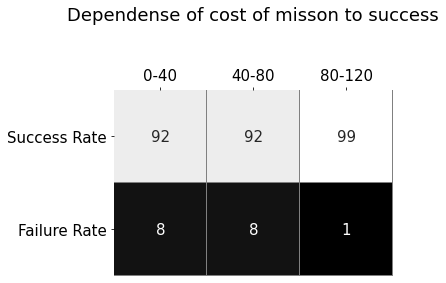

In [146]:
piv = df[["Cost","Status Mission"]].copy()
piv["Status Mission"] = piv["Status Mission"].replace(".* Failure","Failure",regex=True)
piv["Cost range"]=0
piv["Cost range"] = pd.cut(piv["Cost"],bins=[0,40,80,120],labels=["0-40","40-80","80-120"])
piv = pd.crosstab(columns=piv["Status Mission"],index=piv["Cost range"])
piv["Success Rate"] = 100*(piv["Success"] / (piv["Success"]+piv["Failure"]))
piv["Failure Rate"] = 100*(piv["Failure"] / (piv["Success"]+piv["Failure"]))
piv.drop(columns=["Failure","Success"],inplace=True)

fig=plt.figure(figsize=(5,5))
ax=sns.heatmap(piv.T,annot=True,fmt="0.0f",cbar=False,cmap="gray",square=True,linewidths=0.1,linecolor="gray")
ax.xaxis.set_ticks_position('top')

plt.title("Dependense of cost of misson to success\n\n")
plt.ylabel("")
plt.xlabel("")
plt.show()

## 5.3 Analyze Location of launch to success of mission

Now i show top 8 countries is rocket launching 

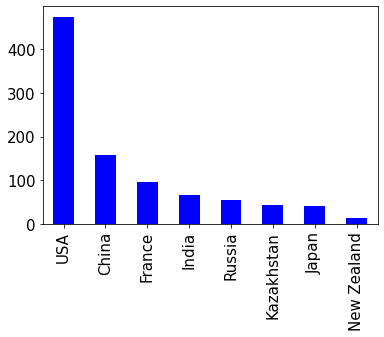

In [147]:
df['Country'].value_counts()[:8].plot(kind='bar',color='blue')

One the axes below you can see  successfull launches of different countries

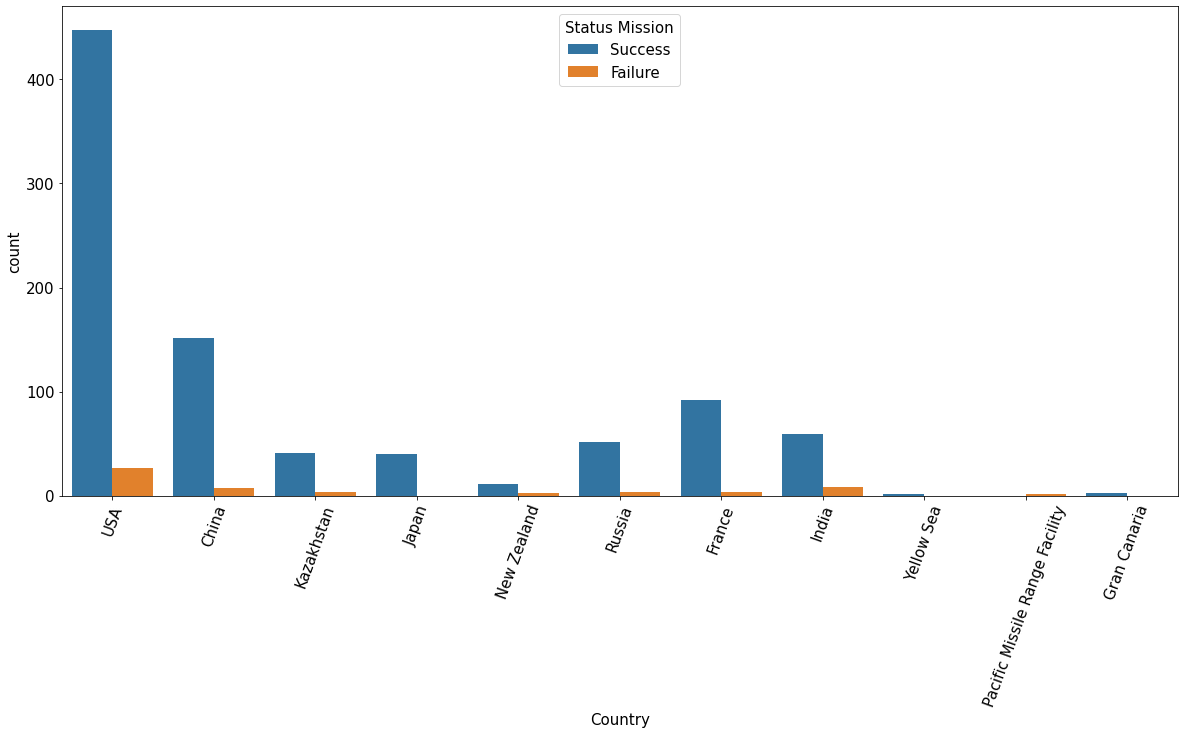

In [148]:
fig_dims = (20, 9)
fig, ax = plt.subplots(figsize=fig_dims)
ax.tick_params(axis='x', rotation=70)
sns.countplot(df['Country'][:1000],hue="Status Mission",data=df)



## 5.4. Analyze rocket status


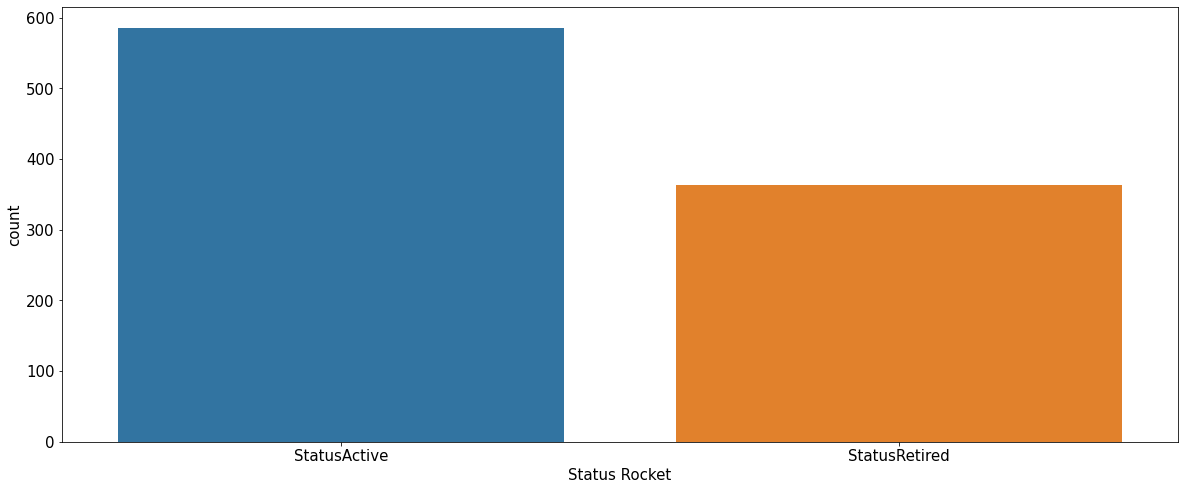

In [149]:
plt.figure(figsize = (20,8))
sns.countplot(df['Status Rocket'])

## 5.5 Analyze failure rate in different company

Top 15 companies repsesented by using barplot

In [150]:
df['Company Name'].value_counts()[:15]

CASC            158
NASA            136
SpaceX           99
ULA              98
Arianespace      96
Northrop         83
ISRO             67
MHI              37
VKS RF           33
US Air Force     26
Roscosmos        23
Kosmotras        22
ILS              13
Eurockot         13
Rocket Lab       13
Name: Company Name, dtype: int64

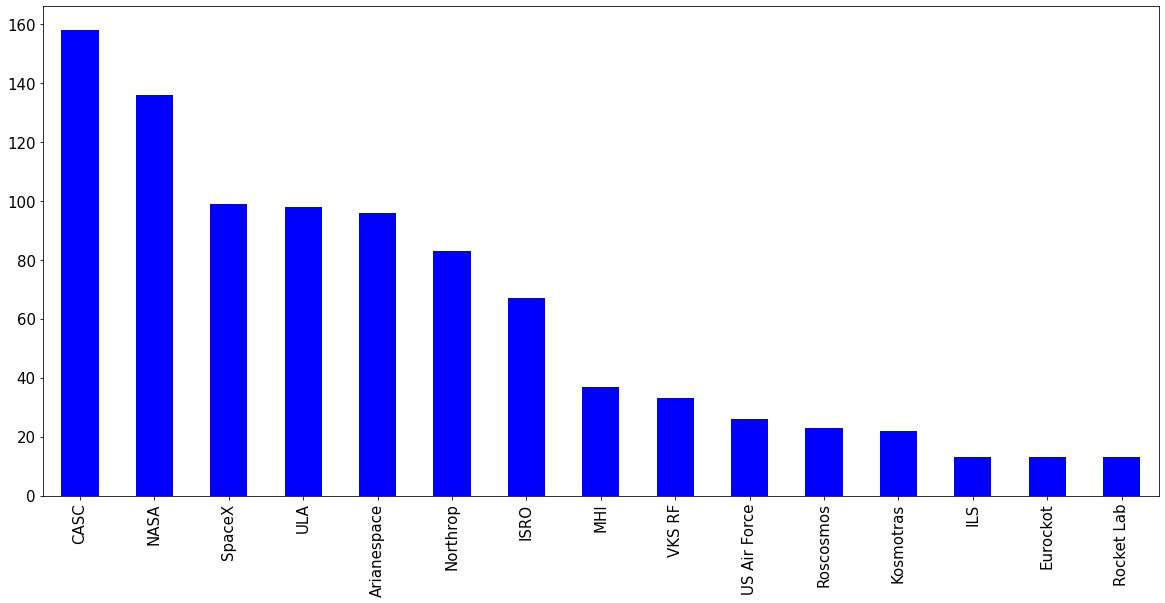

In [151]:
fig_dims = (20, 9)
fig, ax = plt.subplots(figsize=fig_dims)
df['Company Name'].value_counts()[:15].plot(kind='bar',color='blue')

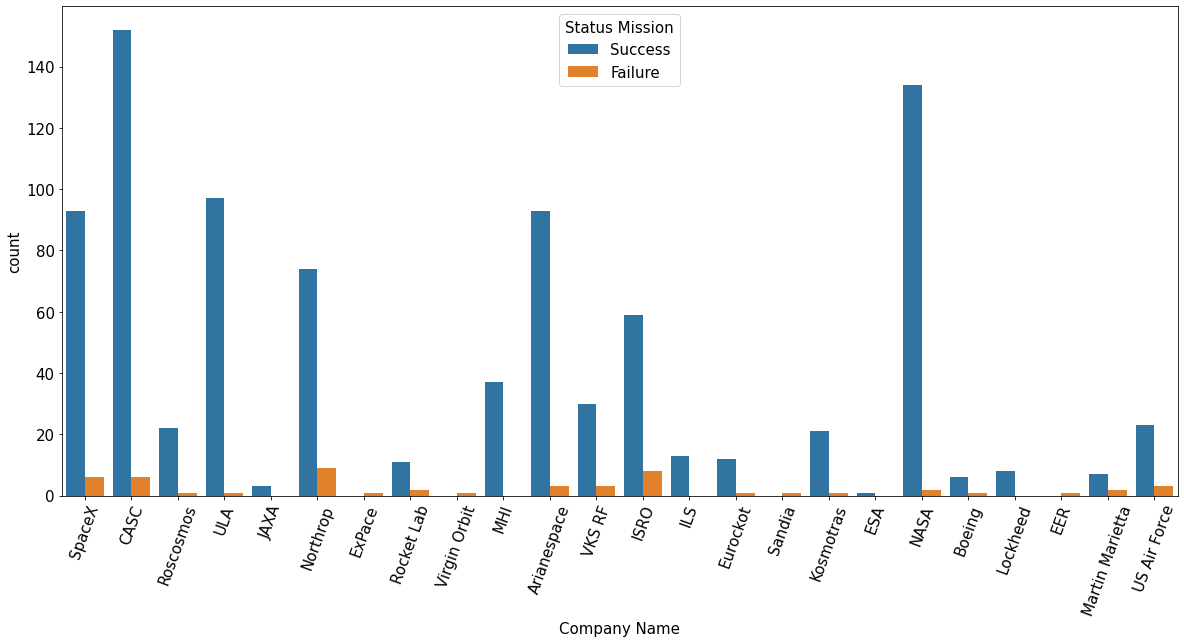

In [152]:
fig_dims = (20, 9)
fig, ax = plt.subplots(figsize=fig_dims)
ax.tick_params(axis='x', rotation=70)
sns.countplot(df['Company Name'][:1000],hue="Status Mission",data=df)

## Conclusion


based on the analysis below, we can draw conclusions:
1. most of the missions are successful
2. the amount of money spent on the mission is directly proportional to the success of the mission
3. the main countries are the United States, China, Russia and France. The ratio of success and failure is almost the same
4. two thirds of all used rockets are still in use
5. the companies with the most missions are CASC Spasex and NASA.companies like ExPace Sandia EER failed all missions